## Cleaning of countries dataset

- Remove small islands

In [13]:
ctys = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

CPU times: user 27.6 s, sys: 250 ms, total: 27.8 s
Wall time: 29.4 s


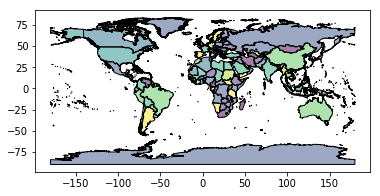

In [33]:
%%time
ctys.plot()

In [47]:
areas = ctys.to_crs(epsg=3857).area

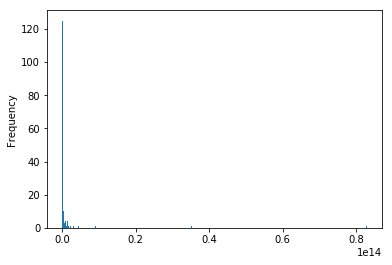

In [48]:
areas.plot.hist(bins=1000)

In [56]:
smallest = areas.max() / 4000

In [57]:
small = areas.loc[areas<smallest].index
large = ctys.loc[ctys.index.difference(small), :].dropna()
#large.plot()

- Antartica

In [58]:
ys = large.centroid.apply(splitter)['y']

In [59]:
large = large.loc[ys > ys.min(), :]

---

In [60]:
%time large = large.to_crs(epsg=3857)

CPU times: user 3.41 s, sys: 39.1 ms, total: 3.45 s
Wall time: 3.89 s


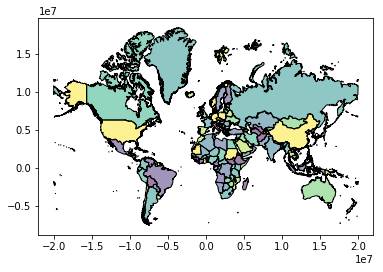

In [62]:
large.plot()

In [61]:
large.to_file('countries_clean')